# Points Prediction College Basketball 2009-2021 + NBA Advanced Stats 

In [1]:
#import library
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics

## Data Extraction

In [2]:
df = pd.read_csv('../data/raw/train.csv')

/var/folders/9j/gbzf9fpd7_v0wb8s40h7d7n80000gn/T/ipykernel_33247/4229903785.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/train.csv')


In [3]:
df.shape

(56091, 64)

In [4]:
df.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

In [6]:
df.describe(include='all')

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
count,56091,56091,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,...,56047.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56091,56091.000000
unique,358,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23929,NaN
top,Army,ACC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06dc8dc2-888e-4941-9106-4798cddfb9d2,NaN
freq,209,2297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
mean,NaN,NaN,23.411973,37.325229,91.858295,18.149265,44.575513,47.676882,5.575376,12.673716,...,-0.442297,0.770611,1.892593,2.663204,1.073038,0.529475,0.282825,5.775381,NaN,0.009556
std,NaN,NaN,10.090542,28.061897,30.538819,6.204489,18.213813,17.414133,9.480239,10.878099,...,3.279438,0.738899,1.479148,2.099913,1.171148,0.469152,0.417754,4.953723,NaN,0.097287
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,16.000000,9.500000,84.100000,14.500000,40.100000,43.930000,1.800000,8.400000,...,-1.728030,0.225800,0.700000,1.000000,0.222200,0.160000,0.000000,1.571400,NaN,0.000000
50%,NaN,NaN,28.000000,35.900000,97.100000,18.100000,47.700000,50.850000,4.300000,11.900000,...,-0.313051,0.545500,1.633300,2.259300,0.677400,0.424200,0.133300,4.482800,NaN,0.000000
75%,NaN,NaN,31.000000,62.200000,106.900000,21.800000,53.200000,56.060000,8.100000,16.000000,...,1.066415,1.111100,2.758600,3.833300,1.533300,0.793100,0.366700,9.069000,NaN,0.000000


In [7]:
df_cleaned = df.copy()

In [8]:
target = df_cleaned.pop("player_id")

In [9]:
df_cleaned["num"].isnull().sum().sum()

4690

In [49]:
# Replace NaN values with 0
df_cleaned = df_cleaned.fillna(0)

In [21]:
num_cols = list(df_cleaned.select_dtypes('number').columns)
cat_cols = list(set(df_cleaned.columns) - set(num_cols))

In [28]:
cat_cols

['team', 'type', 'num', 'yr', 'ht', 'conf']

In [30]:
df[cat_cols] = df[cat_cols].astype(str)

In [39]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
for column in cat_cols:
    df_cleaned[column] = le.fit_transform(df_cleaned[column].astype(str))

In [40]:
df_cleaned.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
0,187,27,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,0.0
1,254,33,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,0.0
2,193,7,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,0.0
3,148,34,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0.0
4,144,10,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0.0


In [43]:
df_cleaned["num"]

0         1
1         1
2         1
3         1
4         1
         ..
56086    36
56087    10
56088     8
56089    20
56090    55
Name: num, Length: 56091, dtype: int64

In [35]:
df_encoded[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

### Split data

In [12]:
#split data
X = df.drop('drafted', axis = 1)
y = df['pts']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(746, 796)
(746,)
(321, 796)
(321,)


## Regression Model

In [13]:
#Linear Regression
lr = LinearRegression()
%time lr.fit(X_train, y_train)
lr.score(X_test, y_test)

CPU times: user 415 ms, sys: 177 ms, total: 591 ms
Wall time: 176 ms


0.9568158047905638

In [14]:
#Ridge Regression
ridge = Ridge(alpha = 0.5)
%time ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

CPU times: user 89 ms, sys: 53.6 ms, total: 143 ms
Wall time: 46.2 ms


0.9860166284931321

In [15]:
#Lasso Regression
lasso = Lasso(alpha = 0.5)
%time lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

CPU times: user 104 ms, sys: 94.2 ms, total: 198 ms
Wall time: 64.3 ms


0.9770076759527755

### Ridge Regression Model is the best score result

In [16]:
#prediction
y_pred = ridge.predict(X_test)
print(y_pred)

[13.12597899  1.58941706 12.13455523 11.65544402 10.08999234  4.41143757
  6.73204083 19.12677233 10.38411748 14.92386098 13.75090835 10.3009782
 21.19738552  2.72000945  7.56369427 15.33559218  6.68085212 20.38920238
 15.18116041 11.62928496 14.58035416  8.51315663 12.16799812 14.5364392
 23.29827804 10.78959346 11.7488761  15.87310098 11.616553    9.07988561
  4.99575497 17.42607657 11.18109429  6.88142901 12.62353186 13.59087661
  2.59045919  6.45648037 15.9375471   3.21219242 13.30190723  9.24760724
 10.19362852 17.53716467 16.9406688  16.15719441 20.011873   19.32793485
 14.79999149 20.46516702 20.3815435  15.45445451 14.67428366 13.59560637
 12.84332665  7.0147745  12.6855369  15.99131895 21.58551069 17.71077721
 17.59137796 11.81016776  9.15304026 15.85538604 16.2580727  14.02685813
  6.7005738   9.62889069 14.55651622 18.00419587 18.67603966  8.3604134
 21.75409131  6.739052   27.93866022 11.88977021  9.89889614 13.68026102
 13.32211249  7.19902726 15.2326175  12.80361152  7.04

In [17]:
#check MAE, MSE & RMSE
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred).round(2))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred).round(2))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred).round(2)))

Mean Absolute Error :  0.42
Mean Squared Error :  0.32
Root Mean Squared Error :  0.648074069840786


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


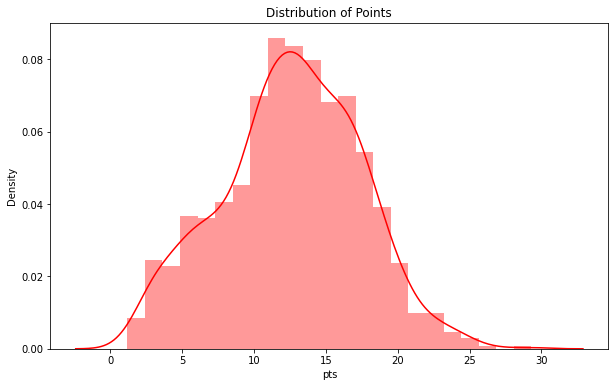

In [18]:
#distribution
plt.figure(figsize = (10,6))
sns.distplot(df['pts'], color = 'r')
plt.title("Distribution of Points")
plt.show()

## Check Feature Importance

In [19]:
#defining feature
coef = pd.Series(ridge.coef_, index = X.columns)

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

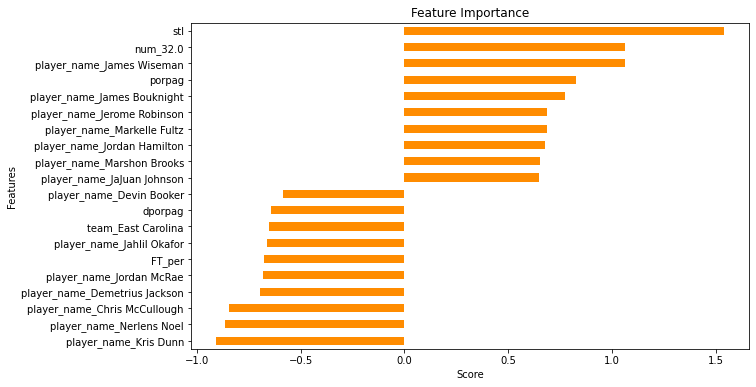

In [20]:
#visualize feature
plt.figure(figsize = (10,6))
imp_coef.plot(kind = 'barh', color = 'darkorange')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

## Visualization

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


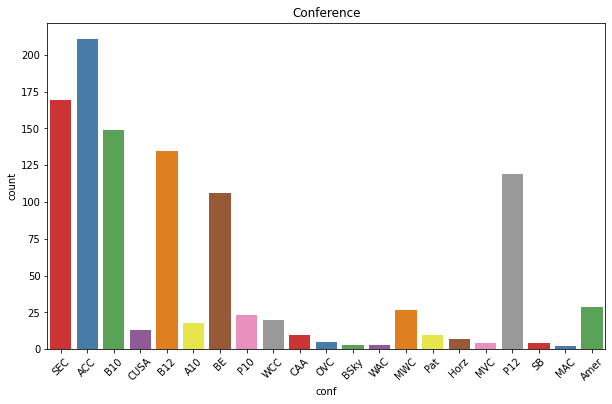

In [21]:
#visualize conference
plt.figure(figsize = (10,6))
chart = sns.countplot(point['conf'], palette = 'Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Conference")
plt.show()

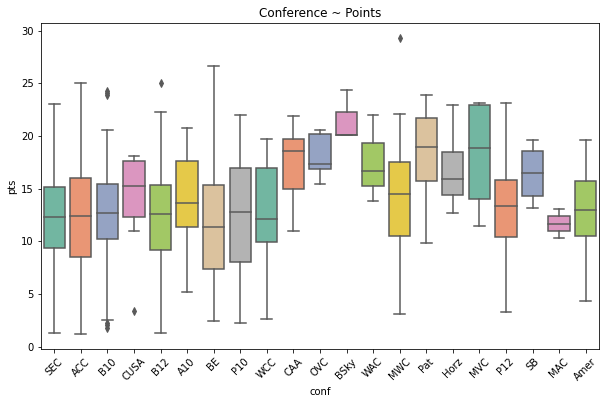

In [22]:
#visualize conference ~ points
plt.figure(figsize = (10,6))
chart = sns.boxplot(data = point, x = 'conf', y = 'pts', palette = 'Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Conference ~ Points")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


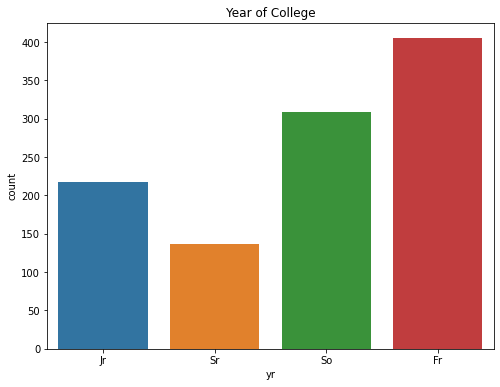

In [23]:
#visualize year of college
plt.figure(figsize = (8,6))
sns.countplot(point['yr'])
plt.title("Year of College")
plt.show()

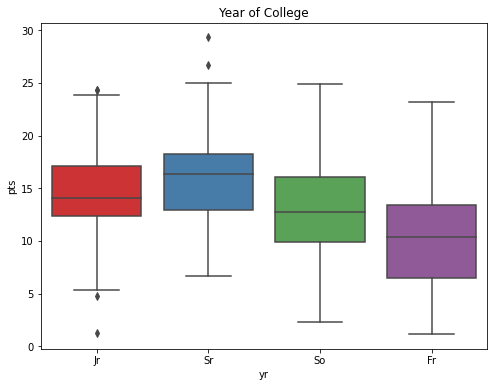

In [24]:
#visualize year of college ~ point
plt.figure(figsize = (8,6))
sns.boxplot(data = point, x = 'yr', y = 'pts', palette = 'Set1')
plt.title("Year of College")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


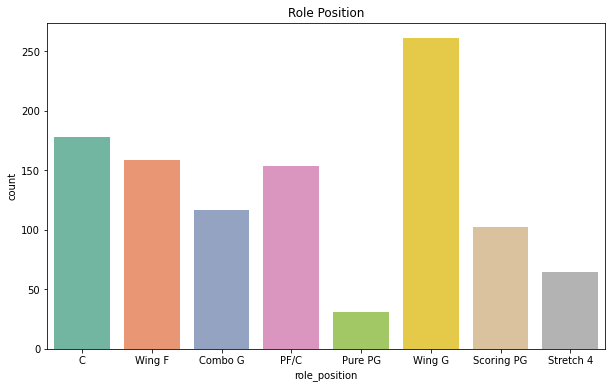

In [25]:
#visualize role position
plt.figure(figsize = (10,6))
sns.countplot(point['role_position'], palette = 'Set2')
plt.title("Role Position")
plt.show()

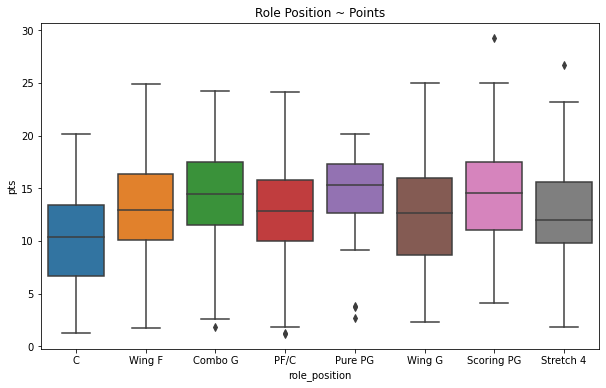

In [26]:
#visualize role position ~ point
plt.figure(figsize = (10,6))
sns.boxplot(data = point, x = 'role_position', y = 'pts')
plt.title("Role Position ~ Points")
plt.show()

In [27]:
#group role position & year of college
role_year = point.groupby(['role_position', 'yr']).size().reset_index(name = 'Count')
print(role_year)

   role_position  yr  Count
0              C  Fr     77
1              C  Jr     34
2              C  So     43
3              C  Sr     24
4        Combo G  Fr     45
5        Combo G  Jr     29
6        Combo G  So     28
7        Combo G  Sr     15
8           PF/C  Fr     59
9           PF/C  Jr     30
10          PF/C  So     46
11          PF/C  Sr     19
12       Pure PG  Fr      8
13       Pure PG  Jr      4
14       Pure PG  So     11
15       Pure PG  Sr      8
16    Scoring PG  Fr     32
17    Scoring PG  Jr     21
18    Scoring PG  So     35
19    Scoring PG  Sr     14
20     Stretch 4  Fr     27
21     Stretch 4  Jr     13
22     Stretch 4  So     17
23     Stretch 4  Sr      8
24        Wing F  Fr     59
25        Wing F  Jr     33
26        Wing F  So     45
27        Wing F  Sr     22
28        Wing G  Fr     98
29        Wing G  Jr     53
30        Wing G  So     84
31        Wing G  Sr     26


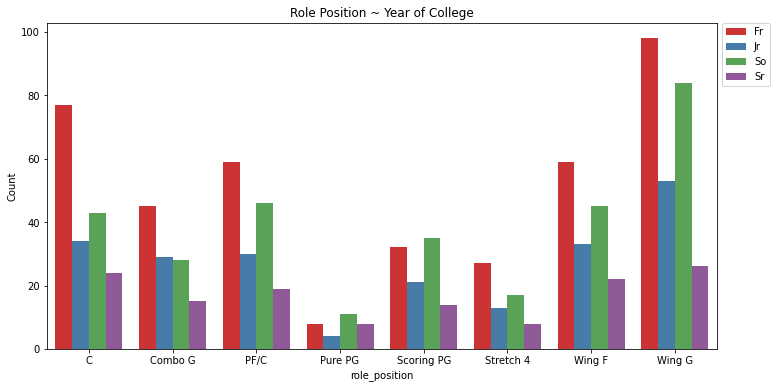

In [28]:
#visualize role position ~ Year of College
plt.figure(figsize = (12,6))
sns.barplot(x = 'role_position', y = 'Count', hue = 'yr', data = role_year, palette = 'Set1')
plt.title("Role Position ~ Year of College")
plt.legend(bbox_to_anchor = (1.08, 1), borderaxespad = 0)
plt.show()